## DDA3020 Autumn 2023 Homework 3 

### Programming Part 2：Neural Networks with PyTorch

#### student ID: 121090429
#### Name: Ou Ziyi

--------------------------------------------------------------------------------------------------------------------------
In this notebook, we will build a fully-connected Neural Network and a Convolutional Neural Network with PyTorch, then apply on the MNIST data-set.

--------------------------------------------------------------------------------------------------------------------------


In [88]:
import numpy as np
import torch
import torch.nn as nn


### 1. Preparation: PyTorch basics and back-propagation (10 points)
PyTorch is one of the most popular frameworks for Deep Learning. To have a quick insight on how to use PyTorch, let's say that most of the functionalities of a numpy array are also maintained for torch tensors, except that the grammar might be slightly different. 

##### 1-1 (0.5 point) 

Set the random seed to 123. Create a random Tensor `a` of shape [3,20,20] with default normal distribution $\mathcal{N}(0,1)$. 

In [89]:
torch.manual_seed(123)
a = torch.randn(3, 20, 20)

##### 1-2 (0.5 point) 
1. Transfer `a` to a numpy array and print `a[0,0]`.
2. Transfer `a` back to torch tensor and print `a[0,0]`.

**Apart from this block, in this section, you shall not to use numpy**



In [90]:
# 1. Transfer a to a numpy array and print a[0,0]
a = np.asarray(a)
print(a[0,0])

# 2. Transfer a back to torch tensor and print a[0,0]
a = torch.from_numpy(a)
print(a[0,0])

[ 0.33737016 -0.17777722 -0.30352753 -0.58801246  0.3486052   0.66034096
 -0.21963757 -0.37916976  0.76710707 -1.192502    0.698352   -1.4097226
  0.17937961  1.895148    0.49544638  0.26919866 -0.07702024 -1.0204725
 -0.16895616  0.917764  ]
tensor([ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196, -0.3792,
         0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,  0.4954,  0.2692,
        -0.0770, -1.0205, -0.1690,  0.9178])


##### 1-3 (1 point) 

Print for `a`: 
- its shape (size)
- its mean value over all entries
- its std over all entries
- its median value over all entries

In [91]:
print("Shape (size) of a:", a.shape)
print("Mean value of a over all entries:", a.mean().item())
print("Standard deviation of a over all entries:", a.std().item())
print("Median value of a over all entries:", a.median().item())

Shape (size) of a: torch.Size([3, 20, 20])
Mean value of a over all entries: -0.0028029950335621834
Standard deviation of a over all entries: 0.996509313583374
Median value of a over all entries: -0.0016409537056460977


##### 1-4 (1 point)

Compute: 
- `b2` = the mean values of `a` along axis 2
- `b12`= the mean values of `a` along axis 1 and 2
- Print the shape of `b2` and `b12`

In [92]:
b2 = torch.mean(a, dim=2)
b12 = torch.mean(a, dim=(1, 2))

print("Shape of b2:",b2.shape)
print("Shape of b12:",b12.shape)

Shape of b2: torch.Size([3, 20])
Shape of b12: torch.Size([3])


##### 1-5 (3 point) 

Set the random seed to 123. Create a neural network `model_tmp` of 3 layers:

- layer 1 ---------- : receives input of length 400, has 128 neurons with bias

- activation 1 ----- : relu

- layer 2 ---------- : receives input of length 128, has 64 neurons with bias

- activation 2 ----- : relu

- layer 3 ---------- : receives input of length 64, has 4 neurons without bias

- activation 3 ----- : softmax over axis -1

[Hint]: you will mainly use modules from torch.nn



In [93]:
import torch.nn as nn
torch.manual_seed(123)

class ModelTmp(nn.Module):
    def __init__(self):
        super(ModelTmp, self).__init__()

        # Layer 1
        self.layer1 = nn.Linear(400, 128, bias=True)
        self.activation1 = nn.ReLU()

        # Layer 2
        self.layer2 = nn.Linear(128, 64, bias=True)
        self.activation2 = nn.ReLU()

        # Layer 3
        self.layer3 = nn.Linear(64, 4, bias=False)
        self.activation3 = nn.Softmax(dim=-1)

    def forward(self, x):
        # Forward pass through the layers
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.activation3(self.layer3(x))
        return x

##### 1-6 (1 point) 

Flatten the two last axis of `a` and apply `model_tmp` on `a`. Print your output.

`[Verify]`: Your output should be $$[[0.2528, 0.2571, 0.2370, 0.2530],\\
        [0.2508, 0.2230, 0.2388, 0.2874],\\
        [0.2643, 0.2372, 0.2225, 0.2761]]$$

In [94]:
model_tmp = ModelTmp()

# Flatten the last two axes of a
a_flattened = a.view(a.size(0), -1)

# Apply model_tmp on a_flattened
output = model_tmp(a_flattened)

# Print the output
print("Output:")
print(output)


Output:
tensor([[0.2528, 0.2571, 0.2370, 0.2530],
        [0.2508, 0.2230, 0.2388, 0.2874],
        [0.2643, 0.2372, 0.2225, 0.2761]], grad_fn=<SoftmaxBackward0>)


##### 1-7 (1 point) 
Calculate the MSE loss between `this output` and an `all-1 tensor`. Print your result.

`[Verify]`: Your output should be 0.5629

[Hint]: You can use either **torch.nn.functional** or **torch.nn** or **torch**


In [95]:
import torch.nn.functional as F

# all-1 tensor
target_tensor = torch.ones_like(output)

# MSE loss
mse_loss = F.mse_loss(output, target_tensor)

# Print the result
print("MSE Loss:", mse_loss.item())

MSE Loss: 0.5628582239151001


##### 1-8 (1 point) 
Excecute `back-propagation` on this loss and extract the gradient of the `final layer` of model_tmp as `grd`. Print `grd[:,5]`

`[Verify]`: You should see $$[ 7.4889 e^{-5}, -2.6256e^{-5}, -3.4365e^{-4},  2.9502 e^{-4}]$$

[Hint]: To extract the weights, you can use w_last_layer = list(model.parameters())[-1] or any other more elegant phrase.

In [96]:
# Excecute backpropagation
model_tmp.zero_grad()  # Clear previous gradients
mse_loss.backward()   # Backward pass to compute gradients

# Extract the gradient of the final layer
w_last_layer = list(model_tmp.parameters())[-1]
grd = w_last_layer.grad

# Print grd[:, 5]
print("Gradient of the final layer:")
print(grd[:, 5])

Gradient of the final layer:
tensor([ 7.4887e-05, -2.6258e-05, -3.4365e-04,  2.9502e-04])


##### 1-9 (1 point) 
1. Create a `SGD optimizer` with learning_rate = `1e-3` associated with the parameters of model_tmp. 
2. Step this optimizer. 
3. Verify that the `variation of the parameters` of the last layer equals `1e-3 * grd`, except that there might be some machine inaccuracies.

[Hint]: You can simple print something and we'll see that most of the entries are near 0 or that most of the entries are near 0.001

In [97]:
import torch.optim as optim
learning_rate = 1e-3
optimizer = optim.SGD(model_tmp.parameters(), lr=learning_rate)
w_last_layer = model_tmp.layer3.weight
initial_params = w_last_layer.data.clone()
expected_variation = 1e-3 * grd
actual_variation = w_last_layer.data - initial_params
comparison = torch.allclose(actual_variation, expected_variation, atol=1e-5) # atol:tolerance
if comparison:
    print("The `variation of the parameters` of the last layer equals `1e-3 * grd`.")
else:
    print("The `variation of the parameters` of the last layer does not equal `1e-3 * grd`.")

The `variation of the parameters` of the last layer equals `1e-3 * grd`.


### 2. Simple fully-connected NN (MLP) (12 points)

**`Procedure`**: (1+1+1+1 = 4 points)
1. Create a fully-connected neural network, which will be a MLP. This NN will take the fattened images ([28,28] -> [28*28]) as input.  
2. Choose your optimizer and criterion (loss function).
3. Train some epoches (you can start with 10) on the MNIST data-set.
4. Keep your best model according to validation loss.
5. `Save your best model and attach it in your submitted zip`.

**`Required outputs`**: (1+1+2 = 4 points)
1. Print averaged train loss and validation loss at the end of each epoch.
2. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
3. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction. 


4 points are given according to your test performance. `4 is given if you have correct test prediction rate > 90.00%`



In [98]:
#### prepare data-set
#### you re expected to have either pickle or torchvision in your environment

import torch
from torch.utils.data import DataLoader, Dataset, Subset
import importlib

# python > 3.4
if importlib.util.find_spec('torchvision') is None: # if you do not have torchvision, use TA's downloaded data
    import pickle as pkl

    with open('./MNIST_dataset_local','rb') as read_file:
        data = pkl.load(read_file)
        read_file.close()

    train_images, train_labels = data['train']
    test_images, test_labels = data['test']

    val_images, val_labels = train_images[5500:], train_labels[5500:]
    train_images, train_labels = train_images[:5500], train_labels[:5500]

    class myMnistDataSet(Dataset):

        def __init__(self,images,labels):
            self.X = images[:,None,...]
            self.y = labels

        def __len__(self):
            return len(self.X)

        def __getitem__(self, index):
            image = self.X[index]
            label = self.y[index]
            return torch.Tensor(image), torch.tensor(label)[0]
        
    mnist_train = myMnistDataSet(train_images, train_labels.astype('int64'))
    mnist_test = myMnistDataSet(test_images, test_labels.astype('int64'))
    mnist_val = myMnistDataSet(val_images, val_labels.astype('int64'))

else: # use torchvision
    from torchvision import transforms, datasets

    mnist_download_path = './MNIST_dataset'
    datasets.MNIST(root=mnist_download_path, download=True)

    mnist_train = datasets.MNIST(root = mnist_download_path, train = True, transform=transforms.ToTensor())
    mnist_val   = Subset(mnist_train, list(range(5500,6000)))
    mnist_train = Subset(mnist_train, list(range(5500)))

    mnist_test  = datasets.MNIST(root = mnist_download_path, train = False, transform=transforms.ToTensor())


def get_loaders(batch_size):
    train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle=True)
    val_loader   = DataLoader(mnist_val, batch_size = batch_size, shuffle=False)
    test_loader  = DataLoader(mnist_test, batch_size = batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


# get to know your loader
batch_size = 32
train_loader, val_loader, test_loader = get_loaders(batch_size)

for im, l in val_loader:
    break

print(im.shape, l.shape)
print(l)

torch.Size([32, 1, 28, 28]) torch.Size([32])
tensor([1, 9, 0, 9, 7, 0, 5, 1, 2, 2, 3, 3, 0, 4, 0, 5, 1, 6, 9, 7, 1, 8, 9, 9,
        6, 0, 5, 1, 2, 2, 1, 3])


Epoch [1/20] - Train Loss: 0.5550, Validation Loss: 0.3174
Epoch [2/20] - Train Loss: 0.2352, Validation Loss: 0.3222
Epoch [3/20] - Train Loss: 0.1607, Validation Loss: 0.2422
Epoch [4/20] - Train Loss: 0.1067, Validation Loss: 0.2427
Epoch [5/20] - Train Loss: 0.0760, Validation Loss: 0.2156
Epoch [6/20] - Train Loss: 0.0533, Validation Loss: 0.2100
Epoch [7/20] - Train Loss: 0.0379, Validation Loss: 0.2028
Epoch [8/20] - Train Loss: 0.0262, Validation Loss: 0.2176
Epoch [9/20] - Train Loss: 0.0132, Validation Loss: 0.1974
Epoch [10/20] - Train Loss: 0.0072, Validation Loss: 0.2251
Epoch [11/20] - Train Loss: 0.0062, Validation Loss: 0.2108
Epoch [12/20] - Train Loss: 0.0047, Validation Loss: 0.2123
Epoch [13/20] - Train Loss: 0.0027, Validation Loss: 0.2171
Epoch [14/20] - Train Loss: 0.0021, Validation Loss: 0.2233
Epoch [15/20] - Train Loss: 0.0017, Validation Loss: 0.2215
Epoch [16/20] - Train Loss: 0.0014, Validation Loss: 0.2180
Epoch [17/20] - Train Loss: 0.0012, Validation Lo

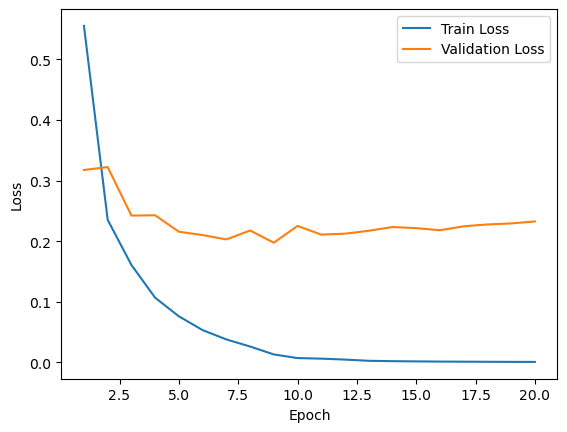

Test Loss: 0.2054
Test Accuracy: 94.51%


In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 150)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(150, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
# Define your model, optimizer, and loss function
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.0025)
criterion = nn.CrossEntropyLoss()

# Function to train the model
def train(model, train_loader, val_loader, optimizer, criterion, num_epochs=10):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # Save the model with the best validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')

    return train_losses, val_losses

# Train the model
num_epochs = 20
train_losses, val_losses = train(model, train_loader, val_loader, optimizer, criterion, num_epochs)

# Plot the training and validation loss
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the best model on the test set
nn_model = MLP()
nn_model.load_state_dict(torch.load('best_model.pth'))
nn_model.eval()

test_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = nn_model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

test_loss /= len(test_loader)
accuracy = correct_predictions / total_samples * 100.0

print(f"Test Loss: {test_loss:.4f}")  # print test loss value 
print(f"Test Accuracy: {accuracy:.2f}%")  # print the rate of correct prediction

# Save the best model
torch.save(nn_model.state_dict(), 'best_nn_model.pth')


### 3. Bonus - Weight game (Bonus 2+4+1 = 7 points. Bonus is for this exercise exclusively)

3-1. Display
- The average image of respectively label 1-10 over the validation set.

3-2. Build a 1-layer NN for this problem. Use `Binary Cross Entropy Loss` as validation criterion. Train some epoches until `validation loss < 0.1`. This 1-layer NN has no more than 2 parameters (w and b). Display w with respect to label 1-10, for:

 - Before training (randomly initialized weights). Print the validation loss at this moment.
 - After val loss < 0.1 

3-3. Use **`one word`** to summarize the mecanism with which this NN works.

[Hint]: 
 - For display, please refer to solution_HW1_polynomial_regression for loop structure. This time you will use plt.imshow()  
 - The weight shape is [10,28*28]. Reshape to [10,28,28] then plot 10 times [28,28]

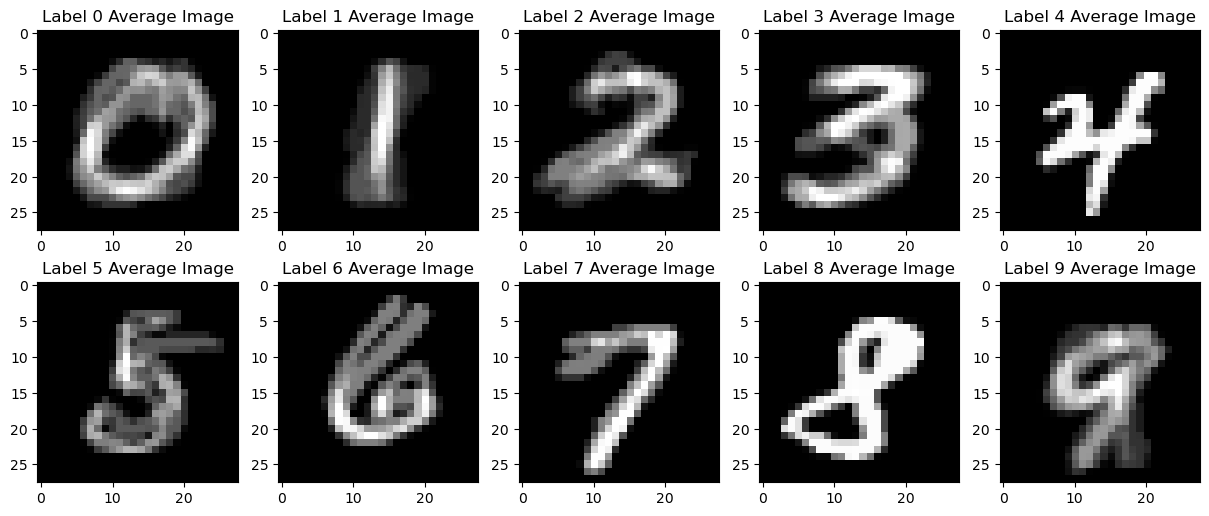

torch.Size([10, 28, 28])


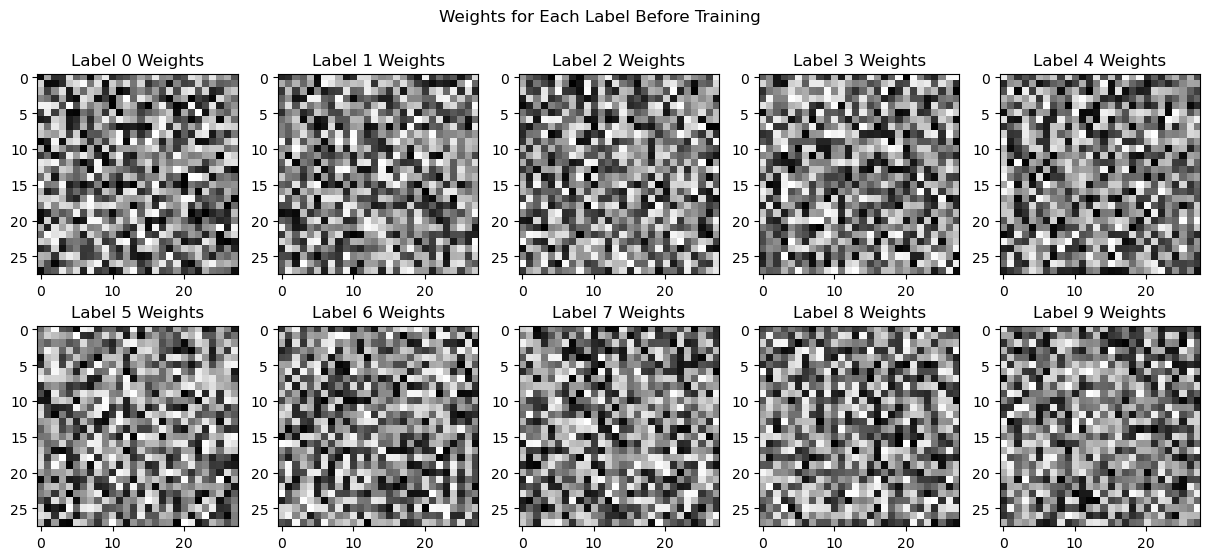

Validation Loss Before Training: 2.3262
torch.Size([10, 28, 28])


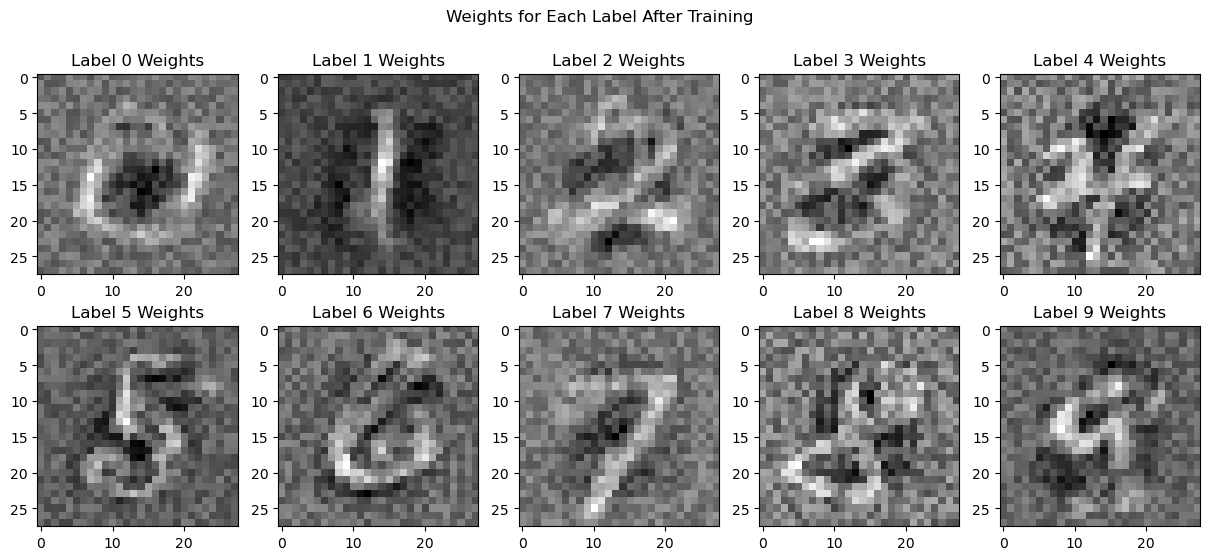

In [100]:
## 3-1. Display
# Calculate average images for each label

for images, labels in val_loader:
    val_images, val_labels = images, labels
    break

average_images = []

for label in range(10):
    label_images = val_images[val_labels == label]
    average_image = np.mean(label_images.numpy(), axis=0)
    average_images.append(average_image)

plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(average_images[i][0], cmap='gray')
    plt.title(f'Label {i} Average Image')

plt.show()



## 3-2. 1-layer NN
class OneLayerNN(nn.Module):
    def __init__(self):
        super(OneLayerNN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear(x)
        return x

model_one_layer = OneLayerNN()
criterion_one_layer = nn.CrossEntropyLoss()
optimizer_one_layer = optim.SGD(model_one_layer.parameters(), lr=0.01)

# Before training (randomly initialized weights)
with torch.no_grad():
    weights = model_one_layer.linear.weight.view(10, 28, 28) # Reshape to [10,28,28]
    print(weights.shape)

    plt.figure(figsize=(15, 6))

    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(weights[i], cmap='gray')
        plt.title(f'Label {i} Weights')

    plt.suptitle("Weights for Each Label Before Training")
    plt.show()

    outputs_before_training = model_one_layer(val_images)
    val_loss_before_training = criterion_one_layer(outputs_before_training, val_labels.view(-1))
    print(f'Validation Loss Before Training: {val_loss_before_training.item():.4f}')

# Train until validation loss < 0.1
while val_loss_before_training >= 0.1:
    optimizer_one_layer.zero_grad()
    outputs = model_one_layer(val_images)
    val_loss_before_training = criterion_one_layer(outputs, val_labels.view(-1))
    val_loss_before_training.backward()
    optimizer_one_layer.step()

# After val loss < 0.1
with torch.no_grad():
    weights = model_one_layer.linear.weight.view(10, 28, 28)
    print(weights.shape)

    plt.figure(figsize=(15, 6))

    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(weights[i], cmap='gray')
        plt.title(f'Label {i} Weights')

    plt.suptitle("Weights for Each Label After Training")
    plt.show()

**One word**: Linear

### 4. CNN (13 points)

`Build your own CNN from scratch (3 points)` to solve this classification problem. Choose any optimizer and criterion that you want. Regulate your CNN structure and try to have as good result as possible.


**`Required outputs`**: (0.5+1+1+2+1 = 5.5 points)
1. Print the number of parameters of your cnn model.
2. Print averaged train loss and validation loss at the end of each epoch.
3. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
4. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction. 
5. Display the confusion matrix of your best model on the test set.
6. `Save your best model and attach it in your submitted zip`.


4.5 points are given according to your test performance. `4.5 is given if you have correct test prediction rate > 97.00%.`

[Hint]: 
1. If you use batch normalizations, be aware of what BatchNorm does while fed with data (you will need to add two lines of codes to manage your training and testing).
1. As for confusion matrix (multi-class classfication), consider a $10\times 10$ matrix where each row represents "gt is" and each column represents "is predicted as", then do a counting with all the test samples. You will obtain a gray-scale image (2D matrix).





------------------------------------------------------------------------------------------------------------------------------------------------
`Discussion for computational cost`: 

If you have NVIDIA card on your PC, you can use `cuda` to accelerate the calculation. However, theoretically, `2 layers of CNN are enough` to have at least 97% test accuracy for this exercise. 

If your PC has no worse than Intel Core i5-8250U Processor (as had the TA's PC in 2019) and your code is well done, the program shall be guaranteed to run fast.

Conventionally, `you are encouraged to construct not too complicated CNN` to save computational cost, since MNIST is a relatively simple problem. However, `as long as your code works out for you, no point will be removed if your CNN is huge`.

------------------------------------------------------------------------------------------------------------------------------------------------


Number of parameters:  415540
Epoch 1/10, Train Loss: 0.5282, Val Loss: 0.1962
Epoch 2/10, Train Loss: 0.1121, Val Loss: 0.1436
Epoch 3/10, Train Loss: 0.0760, Val Loss: 0.0924
Epoch 4/10, Train Loss: 0.0519, Val Loss: 0.0919
Epoch 5/10, Train Loss: 0.0351, Val Loss: 0.1139
Epoch 6/10, Train Loss: 0.0298, Val Loss: 0.1866
Epoch 7/10, Train Loss: 0.0333, Val Loss: 0.1010
Epoch 8/10, Train Loss: 0.0202, Val Loss: 0.1302
Epoch 9/10, Train Loss: 0.0107, Val Loss: 0.2091
Epoch 10/10, Train Loss: 0.0105, Val Loss: 0.1053


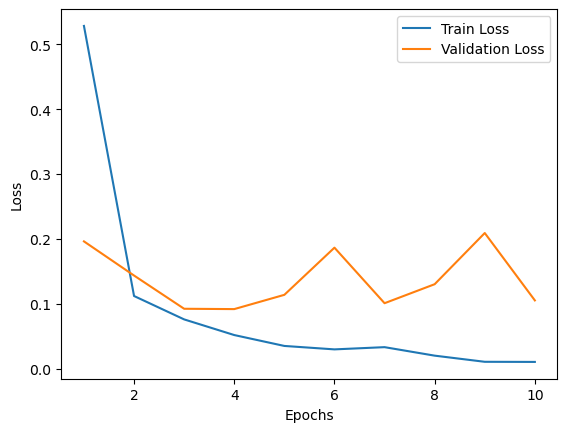

Test Loss: 0.0777
Test Accuracy: 97.96%


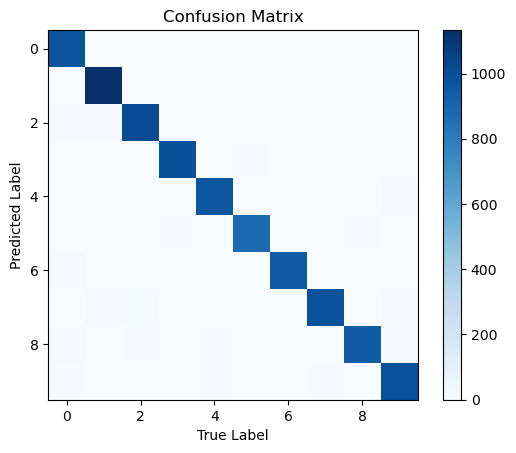

In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 7 * 7, 126)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(126, 10)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.batchnorm1(self.conv1(x))))
        x = self.maxpool2(self.relu2(self.batchnorm2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
cnn_model = CNN()

# Print the number of parameters
total_params = sum(p.numel() for p in cnn_model.parameters())
print("Number of parameters: ", total_params)

# Choose optimizer and criterion
optimizer = optim.Adam(cnn_model.parameters(), lr=0.0025)
criterion = nn.CrossEntropyLoss()

# Train the model
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    average_train_loss = running_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation loss
    cnn_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = cnn_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    average_val_loss = val_loss / len(val_loader)
    val_losses.append(average_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}")

# Plot the training and validation loss
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the model
cnn_model.eval()
test_loss = 0.0
correct_predictions = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predictions = torch.max(outputs, 1)
        correct_predictions += (predictions == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

average_test_loss = test_loss / len(test_loader)
accuracy = correct_predictions / len(mnist_test)

print(f"Test Loss: {average_test_loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

# Save the best model
torch.save(cnn_model.state_dict(), 'best_cnn_model.pth')